In [52]:
import os
import torch
from torch.optim import Adam
from torchvision import datasets, transforms
from network import Autoencoder, Conv_Autoencoder, add_white_noise
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


# Task 1

Epoch [1/50], Training Loss: 0.1671
Epoch [2/50], Training Loss: 0.1114
Epoch [3/50], Training Loss: 0.1037
Epoch [4/50], Training Loss: 0.0999
Epoch [5/50], Training Loss: 0.0962
Epoch [6/50], Training Loss: 0.0914
Epoch [7/50], Training Loss: 0.0864
Epoch [8/50], Training Loss: 0.0838
Epoch [9/50], Training Loss: 0.0824
Epoch [10/50], Training Loss: 0.0814
Epoch [10/50], Test Loss: 0.0819


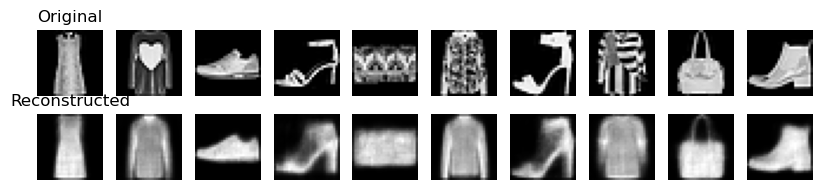

Epoch [11/50], Training Loss: 0.0805
Epoch [12/50], Training Loss: 0.0799
Epoch [13/50], Training Loss: 0.0794
Epoch [14/50], Training Loss: 0.0790
Epoch [15/50], Training Loss: 0.0786
Epoch [16/50], Training Loss: 0.0782
Epoch [17/50], Training Loss: 0.0777
Epoch [18/50], Training Loss: 0.0766
Epoch [19/50], Training Loss: 0.0751
Epoch [20/50], Training Loss: 0.0739
Epoch [20/50], Test Loss: 0.0746


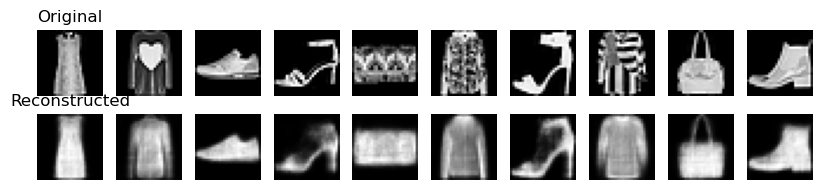

Epoch [21/50], Training Loss: 0.0730
Epoch [22/50], Training Loss: 0.0722
Epoch [23/50], Training Loss: 0.0717
Epoch [24/50], Training Loss: 0.0711
Epoch [25/50], Training Loss: 0.0708
Epoch [26/50], Training Loss: 0.0704
Epoch [27/50], Training Loss: 0.0702
Epoch [28/50], Training Loss: 0.0699
Epoch [29/50], Training Loss: 0.0697
Epoch [30/50], Training Loss: 0.0694
Epoch [30/50], Test Loss: 0.0702


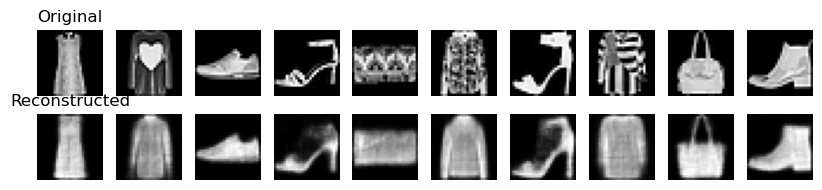

Epoch [31/50], Training Loss: 0.0693
Epoch [32/50], Training Loss: 0.0691
Epoch [33/50], Training Loss: 0.0690
Epoch [34/50], Training Loss: 0.0688
Epoch [35/50], Training Loss: 0.0688
Epoch [36/50], Training Loss: 0.0684
Epoch [37/50], Training Loss: 0.0684
Epoch [38/50], Training Loss: 0.0683
Epoch [39/50], Training Loss: 0.0682
Epoch [40/50], Training Loss: 0.0681
Epoch [40/50], Test Loss: 0.0691


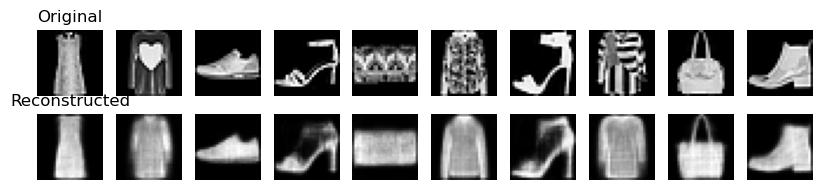

Epoch [41/50], Training Loss: 0.0679
Epoch [42/50], Training Loss: 0.0679
Epoch [43/50], Training Loss: 0.0678
Epoch [44/50], Training Loss: 0.0677
Epoch [45/50], Training Loss: 0.0677
Epoch [46/50], Training Loss: 0.0676
Epoch [47/50], Training Loss: 0.0675
Epoch [48/50], Training Loss: 0.0674
Epoch [49/50], Training Loss: 0.0673
Epoch [50/50], Training Loss: 0.0673
Epoch [50/50], Test Loss: 0.0680


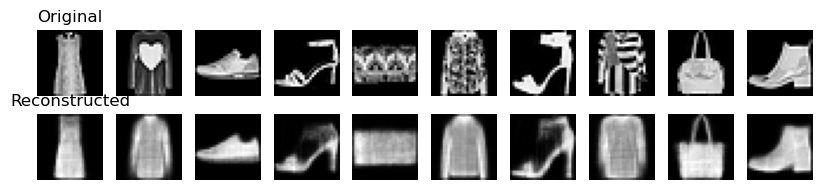

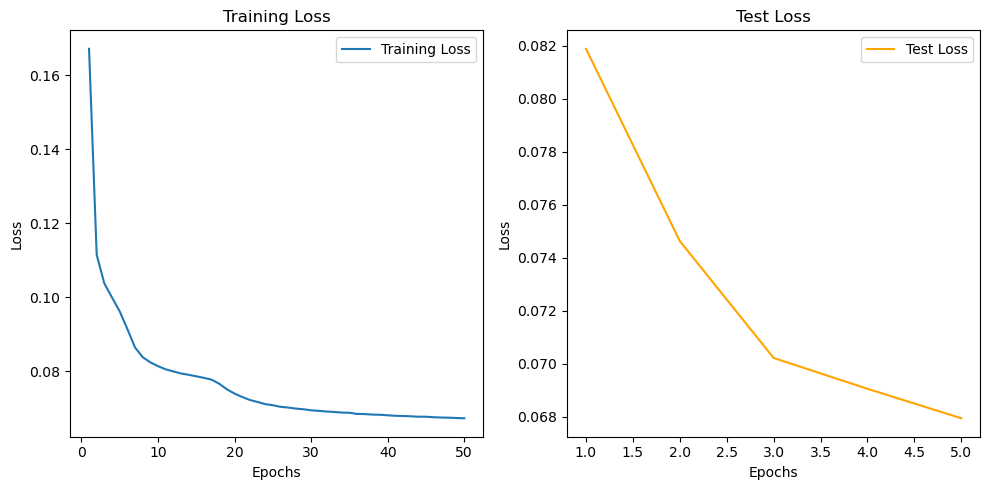

In [53]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Fashion MNIST image has form 1x1x28x28 (grayscale)

autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50

# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data,_ in train_loader:
        img = data.to(device)
        img = img.view(img.size(0), -1)  # Flatten the images
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data,_ in test_loader:
                img = data.to(device)
                img = img.view(img.size(0), -1)  # Flatten the images
                output = autoencoder(img)
                loss = criterion(output, img)
                test_loss += loss.item()

        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')
        img = img.detach().cpu().numpy()
        output = output.detach().cpu().numpy()
        fig, axes = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(10):
            # Plot original images
            ax = axes[0, i]
            ax.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                    ax.set_title('Original')
                
            # Plot reconstructed images
            ax = axes[1, i]
            ax.imshow(output[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Reconstructed')
        plt.show()


# Plot training and testing loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 5 + 1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Task 2

Epoch [1/50], Training Loss: 0.1836
Epoch [2/50], Training Loss: 0.1162
Epoch [3/50], Training Loss: 0.0972
Epoch [4/50], Training Loss: 0.0921
Epoch [5/50], Training Loss: 0.0892
Epoch [6/50], Training Loss: 0.0877
Epoch [7/50], Training Loss: 0.0864
Epoch [8/50], Training Loss: 0.0854
Epoch [9/50], Training Loss: 0.0846
Epoch [10/50], Training Loss: 0.0831


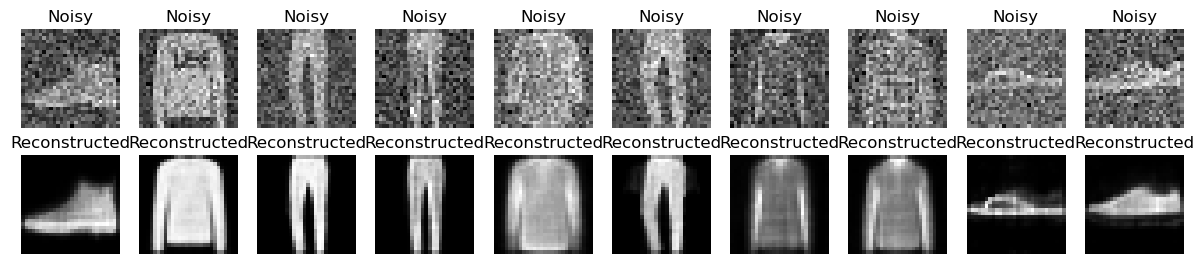

Epoch [10/50], Test Loss: 0.0826
Epoch [11/50], Training Loss: 0.0817
Epoch [12/50], Training Loss: 0.0804
Epoch [13/50], Training Loss: 0.0791
Epoch [14/50], Training Loss: 0.0782
Epoch [15/50], Training Loss: 0.0775
Epoch [16/50], Training Loss: 0.0769
Epoch [17/50], Training Loss: 0.0764
Epoch [18/50], Training Loss: 0.0759
Epoch [19/50], Training Loss: 0.0755
Epoch [20/50], Training Loss: 0.0752


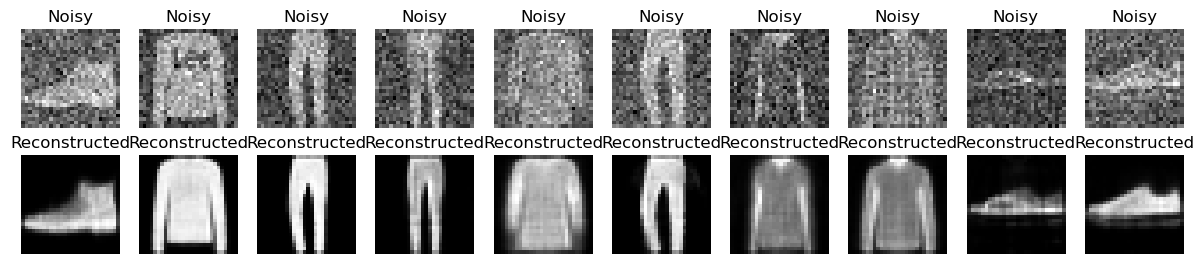

Epoch [20/50], Test Loss: 0.0759
Epoch [21/50], Training Loss: 0.0748
Epoch [22/50], Training Loss: 0.0746
Epoch [23/50], Training Loss: 0.0743
Epoch [24/50], Training Loss: 0.0740
Epoch [25/50], Training Loss: 0.0739
Epoch [26/50], Training Loss: 0.0736
Epoch [27/50], Training Loss: 0.0735
Epoch [28/50], Training Loss: 0.0733
Epoch [29/50], Training Loss: 0.0732
Epoch [30/50], Training Loss: 0.0730


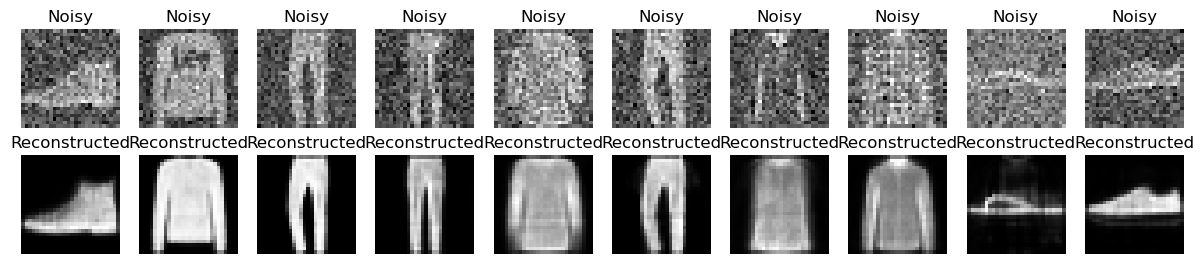

Epoch [30/50], Test Loss: 0.0732
Epoch [31/50], Training Loss: 0.0728
Epoch [32/50], Training Loss: 0.0727
Epoch [33/50], Training Loss: 0.0726
Epoch [34/50], Training Loss: 0.0724
Epoch [35/50], Training Loss: 0.0723
Epoch [36/50], Training Loss: 0.0723
Epoch [37/50], Training Loss: 0.0722
Epoch [38/50], Training Loss: 0.0721
Epoch [39/50], Training Loss: 0.0719
Epoch [40/50], Training Loss: 0.0718


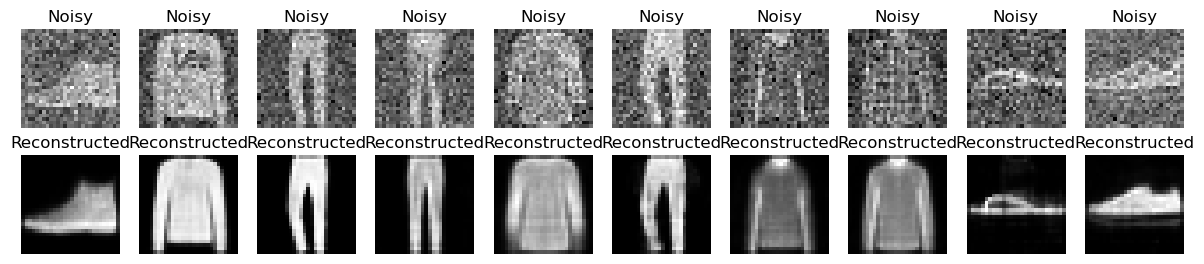

Epoch [40/50], Test Loss: 0.0726
Epoch [41/50], Training Loss: 0.0718
Epoch [42/50], Training Loss: 0.0716
Epoch [43/50], Training Loss: 0.0716
Epoch [44/50], Training Loss: 0.0716
Epoch [45/50], Training Loss: 0.0714
Epoch [46/50], Training Loss: 0.0713
Epoch [47/50], Training Loss: 0.0712
Epoch [48/50], Training Loss: 0.0712
Epoch [49/50], Training Loss: 0.0712
Epoch [50/50], Training Loss: 0.0711


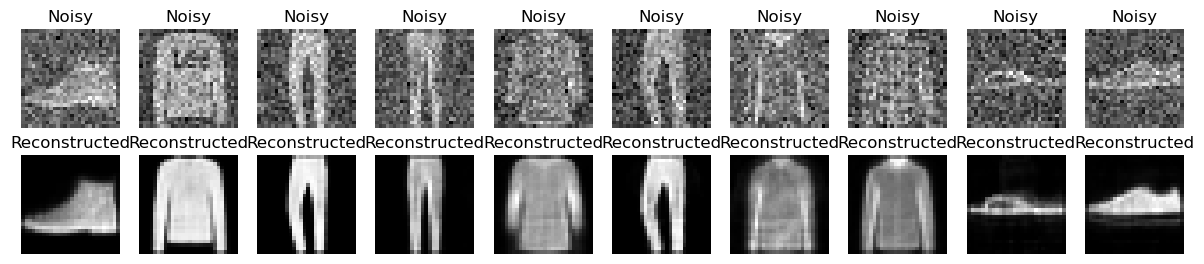

Epoch [50/50], Test Loss: 0.0713


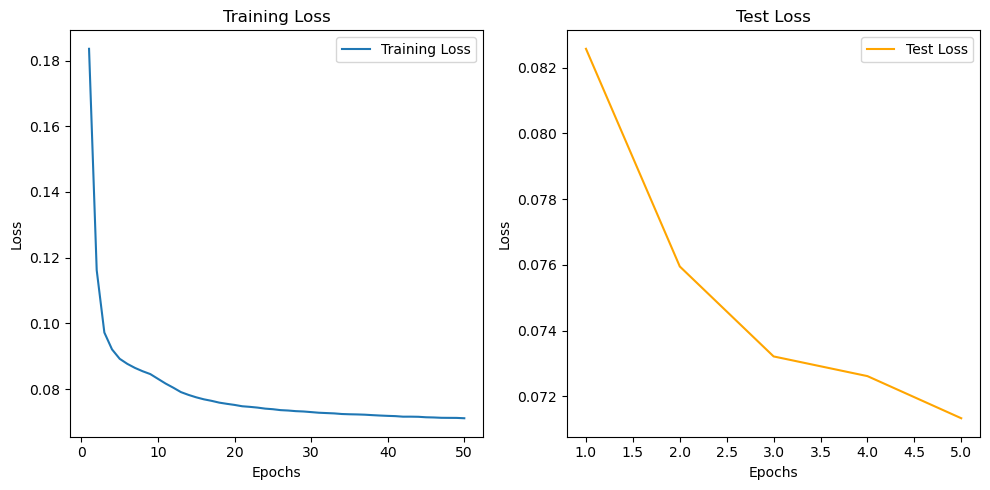

In [54]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Fashion MNIST image has form 1x1x28x28 (grayscale)

autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50

train_losses = []
test_losses = []
# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)  # Flatten the images
        noisy_img = add_white_noise(img).to(device)       # Add noise to the images
        output = autoencoder(noisy_img)
        loss = criterion(output, img)    # Compute loss with respect to original images
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for k,(data,_) in enumerate(test_loader):
                img = data
                img = img.view(img.size(0), -1).to(device)  # Flatten the images
                noisy_img = add_white_noise(img).to(device)       # Add noise to the images
                output = autoencoder(noisy_img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
                if k==0:
                    outputs = output.view(-1, 1, 28, 28).cpu()
                    noisy_data = noisy_img.view(-1, 1, 28, 28).cpu()
                    
                    fig, axes = plt.subplots(2, 10, figsize=(15, 3))
                    for j in range(10):
                        axes[0, j].imshow(noisy_data[j].squeeze(), cmap='gray')
                        axes[0, j].set_title("Noisy")
                        axes[0, j].axis('off')
                        
                        axes[1, j].imshow(outputs[j].squeeze(), cmap='gray')
                        axes[1, j].set_title("Reconstructed")
                        axes[1, j].axis('off')
                    
                    plt.show()
            
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')
        
# Plot training and testing loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 5 + 1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

The performance on the dataset with the noise is a little worse (1% more loss) which is to be expected when considering that the task at hand is more complex. Initially the training loss is also higher on the noisy training. But of course the quality of the reconstruction improves with each passing epoch and the loss continues to decrease.

# Task 3

Epoch [1/50], Training Loss: 0.1376
Epoch [2/50], Training Loss: 0.0820
Epoch [3/50], Training Loss: 0.0748
Epoch [4/50], Training Loss: 0.0703
Epoch [5/50], Training Loss: 0.0674
Epoch [6/50], Training Loss: 0.0652
Epoch [7/50], Training Loss: 0.0634
Epoch [8/50], Training Loss: 0.0620
Epoch [9/50], Training Loss: 0.0607
Epoch [10/50], Training Loss: 0.0598
Epoch [10/50], Test Loss: 0.0601


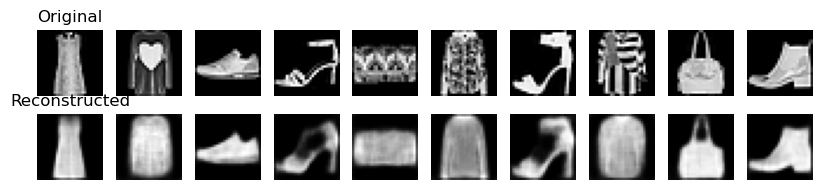

Epoch [11/50], Training Loss: 0.0590
Epoch [12/50], Training Loss: 0.0580
Epoch [13/50], Training Loss: 0.0573
Epoch [14/50], Training Loss: 0.0568
Epoch [15/50], Training Loss: 0.0563
Epoch [16/50], Training Loss: 0.0557
Epoch [17/50], Training Loss: 0.0554
Epoch [18/50], Training Loss: 0.0550
Epoch [19/50], Training Loss: 0.0545
Epoch [20/50], Training Loss: 0.0543
Epoch [20/50], Test Loss: 0.0550


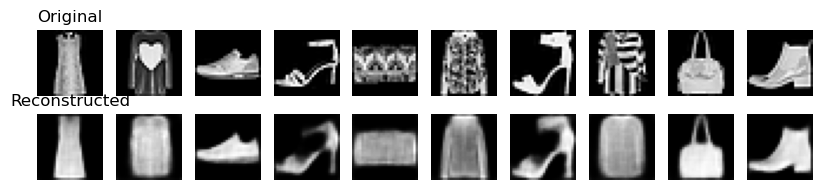

Epoch [21/50], Training Loss: 0.0538
Epoch [22/50], Training Loss: 0.0537
Epoch [23/50], Training Loss: 0.0535
Epoch [24/50], Training Loss: 0.0531
Epoch [25/50], Training Loss: 0.0531
Epoch [26/50], Training Loss: 0.0529
Epoch [27/50], Training Loss: 0.0525
Epoch [28/50], Training Loss: 0.0525
Epoch [29/50], Training Loss: 0.0524
Epoch [30/50], Training Loss: 0.0522
Epoch [30/50], Test Loss: 0.0535


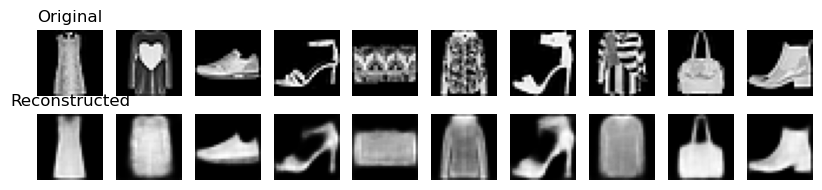

Epoch [31/50], Training Loss: 0.0521
Epoch [32/50], Training Loss: 0.0520
Epoch [33/50], Training Loss: 0.0518
Epoch [34/50], Training Loss: 0.0518
Epoch [35/50], Training Loss: 0.0515
Epoch [36/50], Training Loss: 0.0516
Epoch [37/50], Training Loss: 0.0515
Epoch [38/50], Training Loss: 0.0514
Epoch [39/50], Training Loss: 0.0513
Epoch [40/50], Training Loss: 0.0512
Epoch [40/50], Test Loss: 0.0522


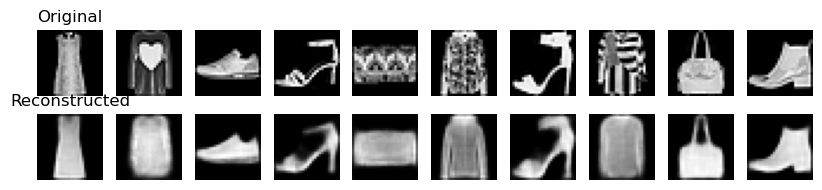

Epoch [41/50], Training Loss: 0.0512
Epoch [42/50], Training Loss: 0.0511
Epoch [43/50], Training Loss: 0.0511
Epoch [44/50], Training Loss: 0.0510
Epoch [45/50], Training Loss: 0.0509
Epoch [46/50], Training Loss: 0.0508
Epoch [47/50], Training Loss: 0.0508
Epoch [48/50], Training Loss: 0.0508
Epoch [49/50], Training Loss: 0.0507
Epoch [50/50], Training Loss: 0.0507
Epoch [50/50], Test Loss: 0.0522


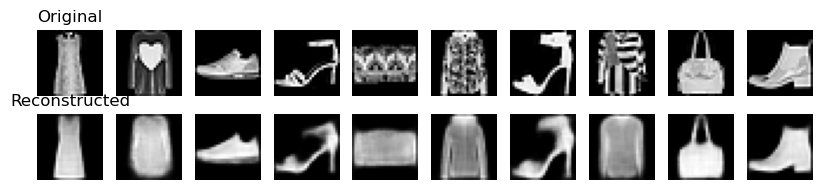

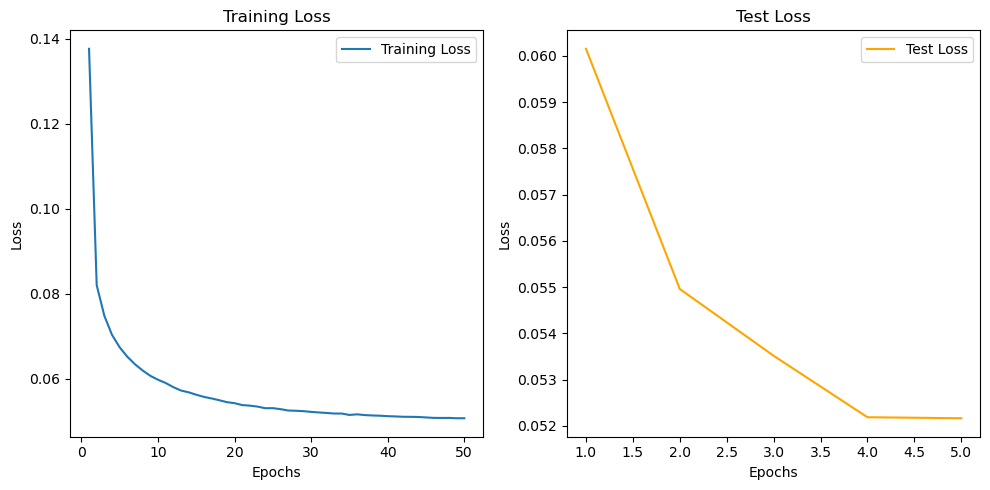

In [55]:
# Data loading and transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Model, loss function, and optimizer
autoencoder = Conv_Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50


# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data, _ in train_loader:
        img = data.to(device)
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every 10 epoch
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data, _ in test_loader:
                img = data.to(device)
                #img = img.view(img.size(0), -1)  # Flatten the images      # Add noise to the images
                output = autoencoder(img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

        img = img.detach().cpu().numpy()
        output = output.detach().cpu().numpy()
        fig, axes = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(10):
            # Plot original images
            ax = axes[0, i]
            ax.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Original')
                
            # Plot reconstructed images
            ax = axes[1, i]
            ax.imshow(output[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Reconstructed')
        plt.show()

# Plot training and testing loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 5 + 1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

The loss on the convolutional autoencoder is lower compared to the linear autoencoder. Reasons for that is the ability of conv. autoencoders to capture the local spatial structures. We also have translation invariance with conv. autoencoder which results to better recognition of the image regardless of the shift of the image. There are also fewer parameters in the conv. autoencoder which results on better generalization.   